**Описание проекта**
 
Основная цель проекта: проанализировать данные сервиса аренды самокатов GoFast и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.Сервисом можно пользоваться:

без подписки:

абонентская плата отсутствует;стоимость одной минуты поездки — 8 рублей;стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra:

абонентская плата — 199 рублей в месяц;стоимость одной минуты поездки — 6 рублей;стоимость старта — бесплатно.

Описание исходных данных

В исходных данных есть информация о пользователях, их поездках и подписках, сгруппированных в файлы.
Пользователи — 'users_go.csv':

'user_id' - уникальный идентификатор пользователя;'name' - имя пользователя;'age' - возраст;'city' - город;'subscription_type' - тип подписки (free, ultra).

Поездки — 'rides_go.csv':

user_id' - уникальный идентификатор пользователя;'distance' - расстояние, которое пользователь проехал в текущей сессии (в метрах);'duration' - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;'date' - дата совершения поездки.

Подписки — 'subscriptions_go.csv':

'subscription_type' - тип подписки;'minute_price' - стоимость одной минуты поездки по данной подписке;'start_ride_price' - стоимость начала поездки;'subscription_fee' - стоимость ежемесячного платёж.
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import numpy as np
from scipy.stats import norm

#### Шаг 1. Загрузка данных

    user_id        name  age            city subscription_type
0         1        Кира   22          Тюмень             ultra
1         2   Станислав   31            Омск             ultra
2         3     Алексей   20          Москва             ultra
3         4  Константин   26  Ростов-на-Дону             ultra
4         5       Адель   28            Омск             ultra
5         6      Регина   25       Краснодар             ultra
6         7       Игорь   23            Омск             ultra
7         8        Юрий   23       Краснодар             ultra
8         9          Ян   21       Пятигорск             ultra
9        10     Валерий   18    Екатеринбург             ultra
10       11       Агата   31       Краснодар             ultra
11       12        Марк   27          Тюмень             ultra
12       13         Ева   24       Краснодар             ultra
13       14    Антонина   18       Пятигорск             ultra
14       15     Валерия   24          Тюмень           

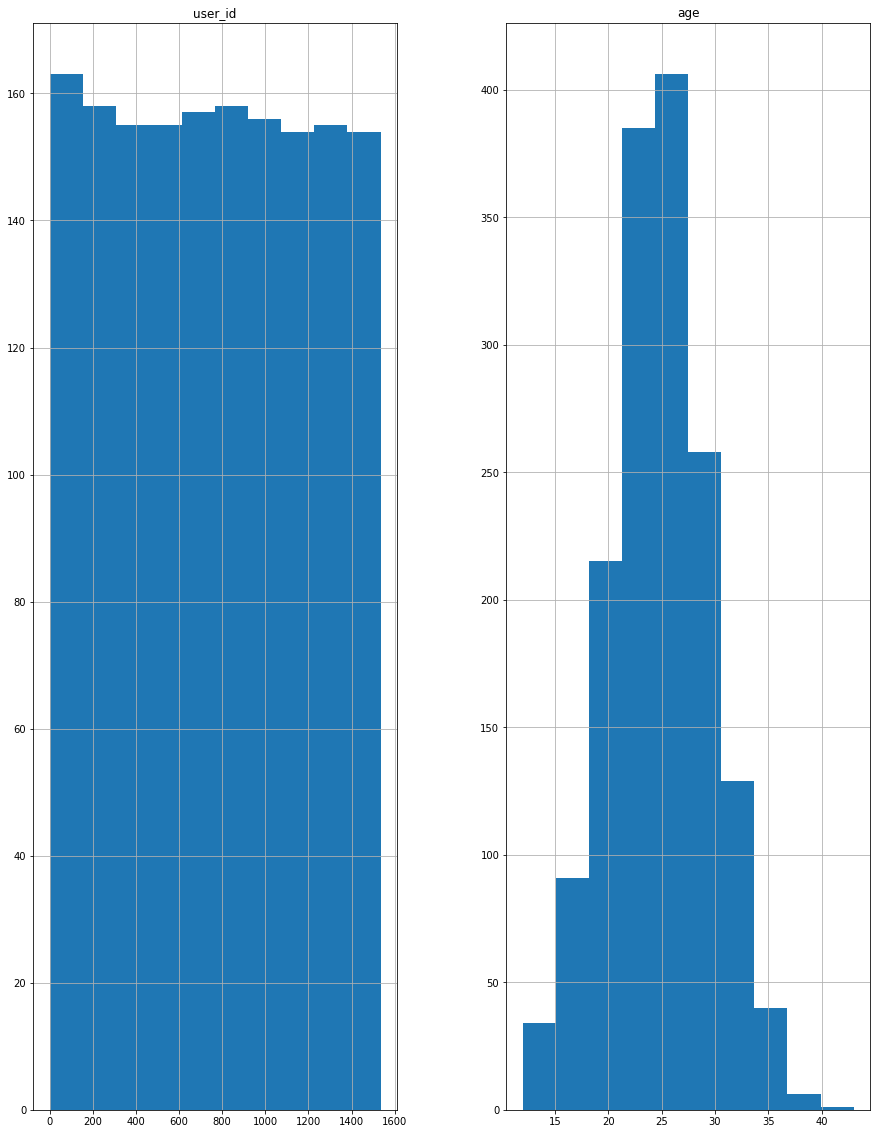

    user_id     distance   duration        date
0         1  4409.919140  25.599769  2021-01-01
1         1  2617.592153  15.816871  2021-01-18
2         1   754.159807   6.232113  2021-04-20
3         1  2694.783254  18.511000  2021-08-11
4         1  4028.687306  26.265803  2021-08-28
5         1  2770.890808  16.650138  2021-10-09
6         1  3039.020292  14.927879  2021-10-19
7         1  2842.118050  23.117468  2021-11-06
8         1  3412.690668  15.238072  2021-11-14
9         1   748.690645  15.041884  2021-11-22
10        1  4031.020195  17.674448  2021-12-14
11        1  2720.609748   9.529463  2021-12-22
12        2  3105.086678  24.307514  2021-03-15
13        2  3053.519401  11.543256  2021-03-18
14        2  4029.116927  25.109188  2021-03-23
            count         mean          std       min          25%  \
user_id   18068.0   842.869936   434.734317  1.000000   487.000000   
distance  18068.0  3070.659976  1116.831209  0.855683  2543.226360   
duration  18068.0    1

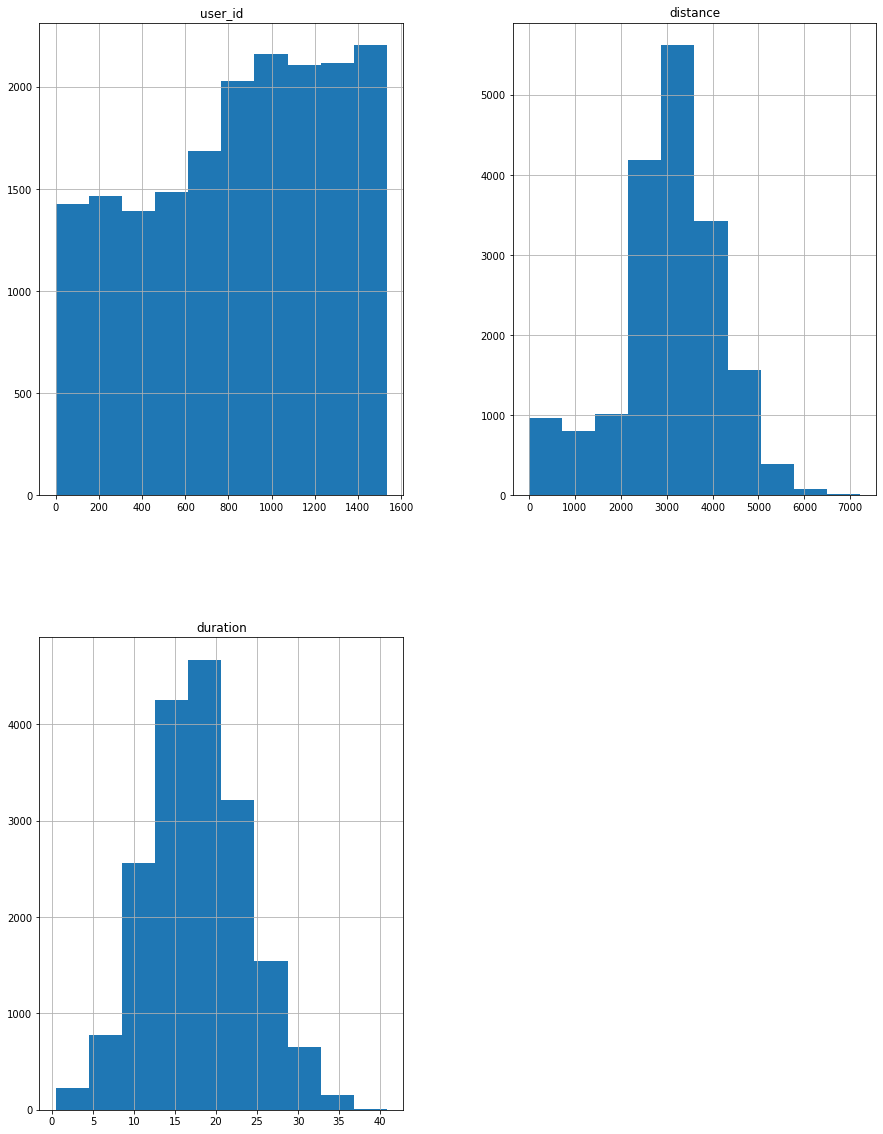

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199
                  count  mean         std  min    25%   50%     75%    max
minute_price        2.0   7.0    1.414214  6.0   6.50   7.0    7.50    8.0
start_ride_price    2.0  25.0   35.355339  0.0  12.50  25.0   37.50   50.0
subscription_fee    2.0  99.5  140.714249  0.0  49.75  99.5  149.25  199.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


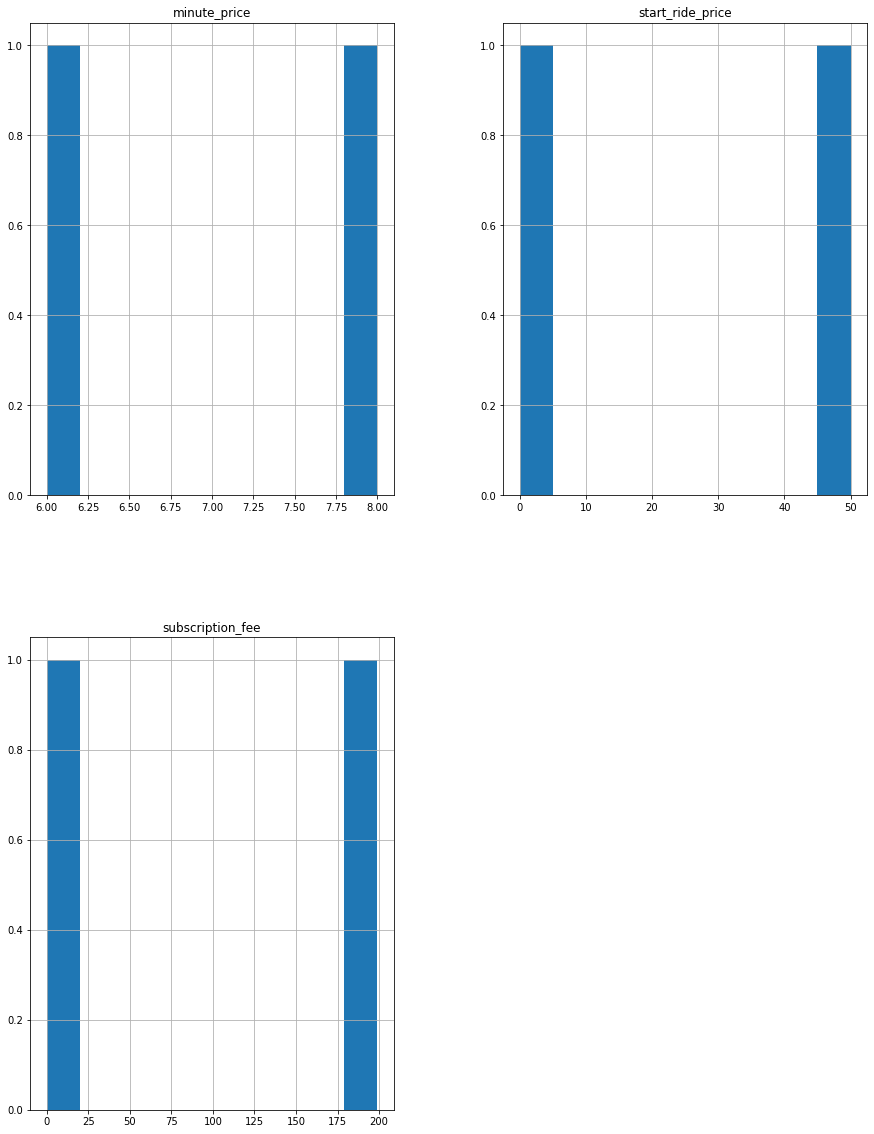

In [2]:
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')
print(data_users.head(15))
print(data_users.describe().T)
print(data_users.info())
data_users.hist(figsize=(15, 20))
plt.show()
print(data_rides.head(15))
print(data_rides.describe().T)
print(data_rides.info())
data_rides.hist(figsize=(15, 20))
plt.show()
print(data_sub.head(15))
print(data_sub.describe().T)
print(data_sub.info())
data_sub.hist(figsize=(15, 20))
plt.show()



#### Шаг 2. Предобработка данных

In [3]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [4]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [5]:
data_sub.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [6]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')
data_rides['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

In [7]:
data_rides['month'] = data_rides['date'].dt.month
data_rides['month'].head(10)

0     1
1     1
2     4
3     8
4     8
5    10
6    10
7    11
8    11
9    11
Name: month, dtype: int64

In [8]:
print(data_users.duplicated().sum())
data_users= data_users.drop_duplicates().reset_index(drop=True)

31


Выявил и удалил дубликаты в датафрейме data_users

In [9]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Неявных дубликатов не наблюдается

In [10]:
data_users.drop_duplicates(inplace=True)

In [11]:
data_users.duplicated().sum()

0

In [12]:
data_rides.duplicated().sum()

0

In [13]:
data_sub.duplicated().sum()

0

**Вывод:**
В целом хорошие файлы, в которых не было особо дубликатов, или пропущенных значений

Привёл столбец data из data_rides к типу даты pandas

Был добавлен новый столбец months


#### Шаг 3. Исследовательский анализ данных

In [14]:
frequency_city = round(data_users['city'].value_counts() / 
                                   data_users['city'].value_counts().sum(), 2) * 100
frequency_city

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

По процентому соотношению, видно, частота встречаемости городов примерно равна

каждый город встречается с вероятностью от 0.11 до 0.14

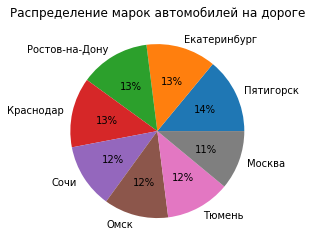

In [15]:
vals = [24, 17, 53, 21, 35]
labels = ["Ford", "Toyota", "BMW", "Audi", "Jaguar"]

plt.pie(frequency_city, labels=frequency_city.index, autopct='%1.0f%%',)
plt.title("Распределение марок автомобилей на дороге")
plt.show()

In [16]:
data_users['subscription_type'].value_counts()
print('отношение людей с беспланой подпиской, к подпсике ultra',round(835/699,3))

отношение людей с беспланой подпиской, к подпсике ultra 1.195


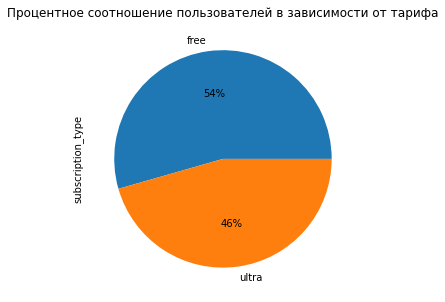

In [17]:
count_sub = data_users['subscription_type'].value_counts()
data_users['subscription_type'].value_counts().plot(
    kind = 'pie', 
    y = count_sub, 
    autopct = '%1.0f%%', 
    figsize=(5,5),
    title = 'Процентное соотношение пользователей в зависимости от тарифа');

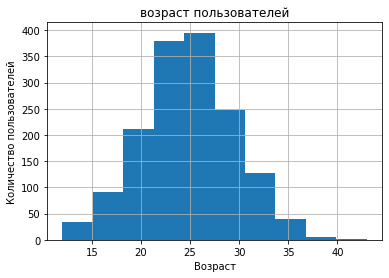

In [18]:
data_users['age'].hist(bins = 10,grid=True)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('возраст пользователей')
plt.show()

Средний возраст пользователей GoFast от 20 до 30 лет

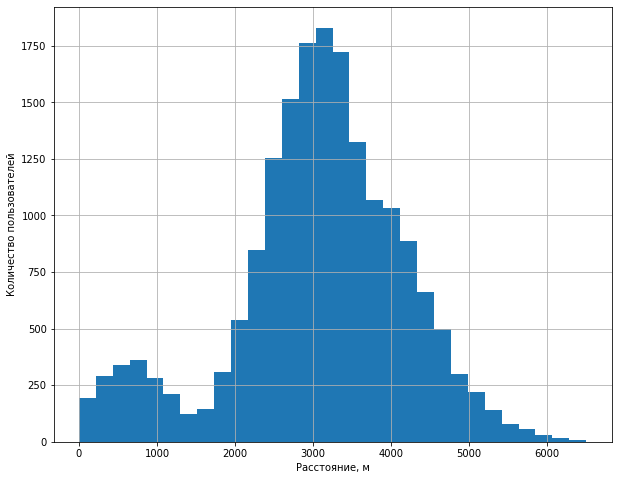

In [19]:
data_rides['distance'].hist(bins = 30,grid=True,figsize=(10,8),range=(0,6500))
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.show()

Cреднее расстояние пройденное пользователями Gofast от 2.5 км до 4 км.

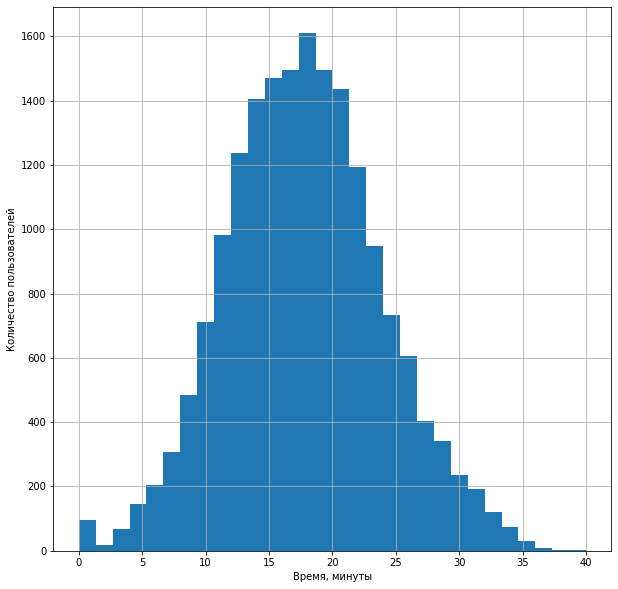

In [20]:
data_rides['duration'].hist(bins = 30,grid=True,figsize=(10,10),range=(0,40))
plt.xlabel('Время, минуты')
plt.ylabel('Количество пользователей')
plt.show()

Средняя длительность поездки примерно занимает 13 - 22 минут

#### Шаг 4. Объединение данных

In [21]:
data_total = data_users.merge(data_rides, on='user_id').merge(data_sub, on='subscription_type')
data_total.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [22]:
 # Датафрейм данных с пользователями с подпиской
data_ultra = data_total.loc[data_total['subscription_type'] == 'ultra']
# Датафрейм данных с пользователями без подписки
data_free = data_total.loc[data_total['subscription_type'] == 'free']

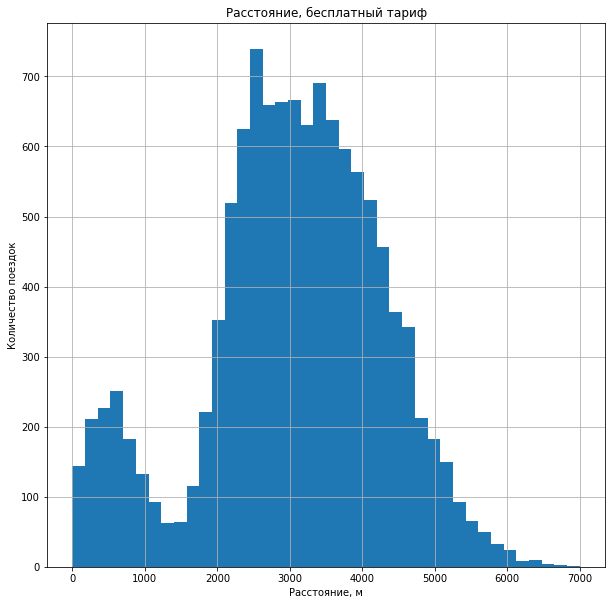

In [23]:
data_free['distance'].hist(bins=40, range = (0, 7000),figsize=(10,10))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

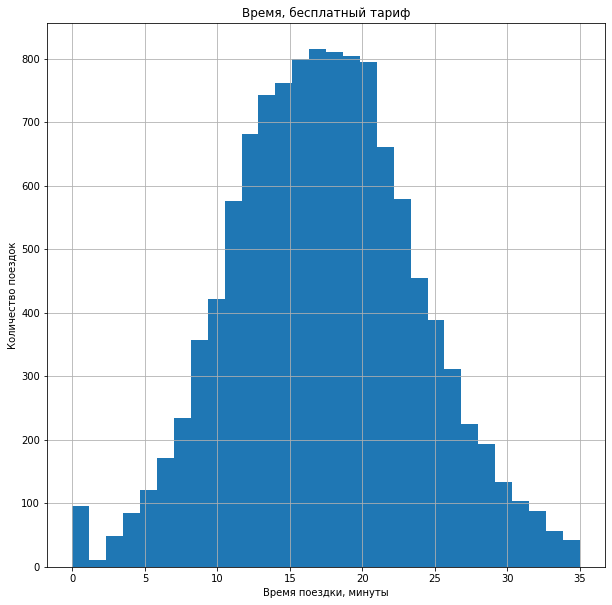

In [24]:
data_free['duration'].hist(bins=30, range = (0, 35),figsize=(10,10))
plt.title('Время, бесплатный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.show()

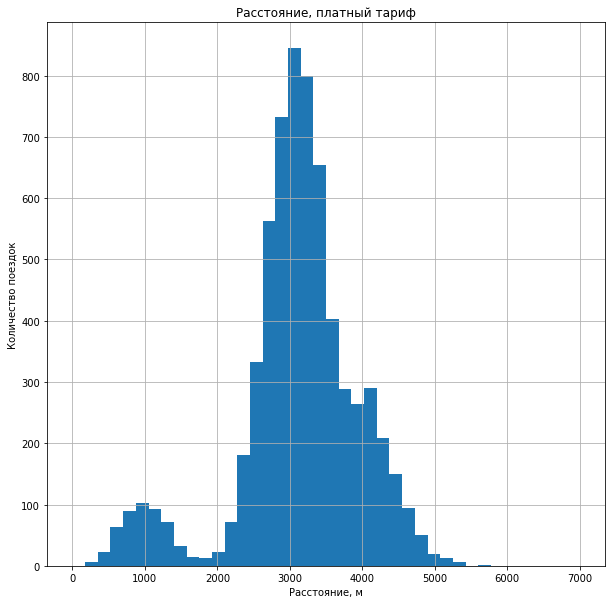

In [25]:
data_ultra['distance'].hist(bins=40, range = (0, 7000),figsize=(10,10))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

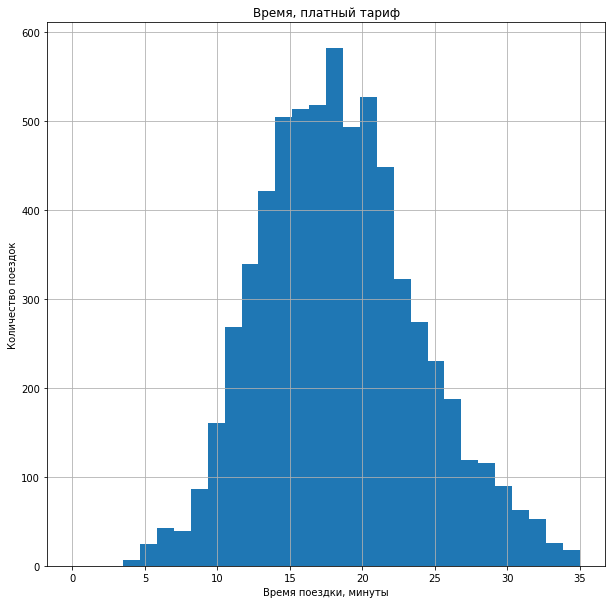

In [26]:
data_ultra['duration'].hist(bins=30, range = (0, 35),figsize=(10,10))
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.show()

In [27]:
data_free.describe() - data_ultra.describe()

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.0,5068.0,5068.0
mean,771.801846,0.000711,-69.950106,-1.151076,0.100687,2.0,50.0,-199.0
std,40.066290,-0.276108,409.278476,0.754755,0.035154,0.0,0.0,0.0
min,699.000000,0.000000,-243.354755,-3.260353,0.000000,2.0,50.0,-199.0
25%,740.000000,0.000000,-418.881328,-1.566217,0.000000,2.0,50.0,-199.0
50%,772.000000,0.000000,-33.988764,-0.851263,1.000000,2.0,50.0,-199.0
75%,803.000000,0.000000,345.123469,-0.290058,0.000000,2.0,50.0,-199.0
max,835.000000,5.000000,1511.238083,-5.875464,0.000000,2.0,50.0,-199.0


**Вывод**

Объединили данные о пользователях, поездках и тарифах в один датафрейм - data_total.

Выделили из этого датафрейма, 2 датафрейма с следующими условиями:

data_free - Информация о пользователях с бесплатным тарифом
data_ultra - Информация о пользователях с платным тарифом

Визуализировали информацию о расстоянии и времени для каждого из тарифов.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи

Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.

Общее количество. Поездок с исползьзованием подписки 'free' на 5068 больше, чем с использованием подписки 'ultra'

Дистанция поездок при использовании подписки 'free' более разнообразна. Так максимальная дистанция больше на 1061 метров, а минимальная на 243 метра меньше, чем при использовании подписки 'ultra'. 


#### Шаг 5. Подсчёт выручки

In [28]:
data_total['duration'] = np.ceil(data_total['duration'])
users_months = pd.pivot_table(data_total,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name','subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : len,
                                     'subscription_type' : max})
users_months.rename(columns = {'name' : 'rides_count'}, inplace = True)

users_months.head(15)

distance  duration  rides_count subscription_type
month user_id                                                      
1     1        7027.511294      42.0            2             ultra
      3        3061.777147      13.0            1             ultra
      5        3914.646990      13.0            1             ultra
      7        6478.080979      28.0            2             ultra
      12       3577.151148      33.0            1             ultra
      13       6687.987446      42.0            2             ultra
      14       7699.643820      35.0            2             ultra
      15       4187.621459      39.0            1             ultra
      20       3516.719208      29.0            1             ultra
      22       3058.692225      13.0            1             ultra
      25       3440.353053      17.0            1             ultra
      26       6545.964099      28.0            2             ultra
      30       7774.720501      25.0            2             ultra
      32       3734.993902      25.0            1             ultra
      35       9707.810053      57.0            3             ultra

In [29]:
def money(df):
    if df['subscription_type'] == 'ultra':
        return 6 * df['duration'] + 199
    else:
        return 8 * df['duration'] + 50 * df['rides_count']
users_months['money_months']=np.ceil(users_months.apply(money, axis=1))
users_months.head(10)

distance  duration  rides_count subscription_type  \
month user_id                                                         
1     1        7027.511294      42.0            2             ultra   
      3        3061.777147      13.0            1             ultra   
      5        3914.646990      13.0            1             ultra   
      7        6478.080979      28.0            2             ultra   
      12       3577.151148      33.0            1             ultra   
      13       6687.987446      42.0            2             ultra   
      14       7699.643820      35.0            2             ultra   
      15       4187.621459      39.0            1             ultra   
      20       3516.719208      29.0            1             ultra   
      22       3058.692225      13.0            1             ultra   

               money_months  
month user_id                
1     1               451.0  
      3               277.0  
      5               277.0  
      7               367.0  
      12              397.0  
      13              451.0  
      14              409.0  
      15              433.0  
      20              373.0  
      22              277.0

Создал новый датафрейм с агрегированными данными (users_months) на основе датафрейма data_total.

В нем записал суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавил столбец с помесячной выручкой, которую принес каждый пользователь

#### Шаг 6. Проверка гипотез

Нулевая и альтернативная гипотезы:

H0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free

H1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free

In [30]:
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater')
alpha=0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


Нулевая и альтернативная гипотезы:

H0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H1: Подписчики в среднем проезжают расстояние больше оптимального > 3130 метров


In [31]:
distanc=3130
results = st.ttest_1samp(data_ultra['distance'],distanc,alternative='greater')
alpha=0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


Нулевая и альтернативная гипотезы:

Н0: Средняя выручка от поездок с разной подпиской равна.

Н1: Средняя выручка от поездок с использованием подписки 'ultra' больше, чем выручка с ипользованием подписки 'free'.

In [36]:
results = st.ttest_ind(
    users_months.loc[users_months['subscription_type'] == 'ultra', 'money_months'] ,
    users_months.loc[users_months['subscription_type'] == 'free', 'money_months'],
    alternative='greater')
alpha=0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


month  user_id
1      1          451.0
       3          277.0
       5          277.0
       7          367.0
       12         397.0
Name: money_months, dtype: float64

*6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?*

Гипотезы будут сформулированы так:

H0 : μ1 = μ2
H1 : μ1 > μ2
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать для проверки гипотезы: st.ttest_ind(before, after, alternative='greater').

#### Шаг 7. Распределения

100.02841955223582


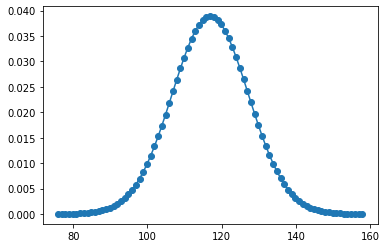

In [33]:
mu = 1169 * 0.1
sigma = (1169 * 0.1 * (1 - 0.1))**0.5
distr = st.norm(mu, sigma)
print(distr.ppf(0.05))
x = np.arange(
        (mu - 4 * sigma), 
        (mu + 4 * sigma), 
        1
)
plt.plot (x, norm.pdf(x, mu, sigma),'o-') 

Путём перебора выявил, что требуется разослать 1169 промокодов, которые приводят к продлению подписки с вероятностью 10%, чтобы 100 клиентов продлили подписку с вероятностью не выполнить план примерно 5%.


0.15371708296369768


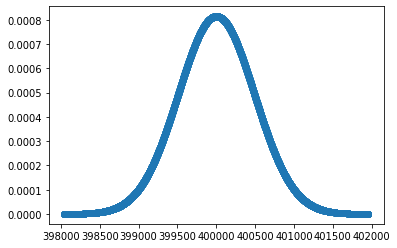

In [34]:
mu1=1000000*0.4
sigma1=(1000000*0.4*(1-0.4))**0.5
distr1 = st.norm(mu1, sigma1)
print(distr1.cdf(399500))
x1= np.arange(
    (mu1 - 4 * sigma1), 
    (mu1 + 4 * sigma1), 
    1
)
plt.plot(x1, st.norm.pdf(x1, mu1, sigma1), 'o-')
plt.show()

Если клиенты открывают письмо с вероятностью 40%, то после рассылки 1млн писем, с вероятность 15%,письмо откроет около 399.5 тыс пользователей

**ВЫВОД**

1.Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

2.Все исходные данные во всех файлах не содержали пропусков, а также дубликатов, кроме тех, которые были обнаружены в файле 'users_go.csv'.

3.Выявленно, что количество пользователей по городам распределено примерно одинаково

4.Пользователей использующих бесплатную подписку больше примерно на 100 человек(чем платную)

5.Средний возраст пользователей от 20 до 30 лет

6.В основном пользователи проезжают от 2.5 км до 4 км.

7.Средняя длительность поездки состовляет 13 - 22 минут

8.Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:

    Для пользователей с ultra подпиской

    Для пользователей с free подпиской

9.Для бесплатного тарифа среднеевремя поездки составляет от 10 до 30 минут, и они проезжают от 2 до 5 км.

10. Для платного тарифа среднее время поездки составляет от 15 до 25 минут, и они проезжают от 2.8 до 4 км.

11.Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм. Добавили в этот датафрейм столбец с помесячной выручкой

12.Проверили гипотезы:

    12а)Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
        Отвергли нулевую гипотезу

    12б)Пользователи с подпиской проезжают расстояние,не превышающее 3130 метров за одну поездку
        не получилось отвергнуть нулевую гипотезу

    12в)Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
        Отвергли нулевую гипотезу

16 Выявили, что требуется разослать 1169 промокодов, чтобы 100 клиентов продлили подписку с вероятностью не сделать этого примерно 5%.

17.Выяснили, если отправить 1млн писем, то с вероятностью 15%,письмо откроет около 399.5 тыс пользователей